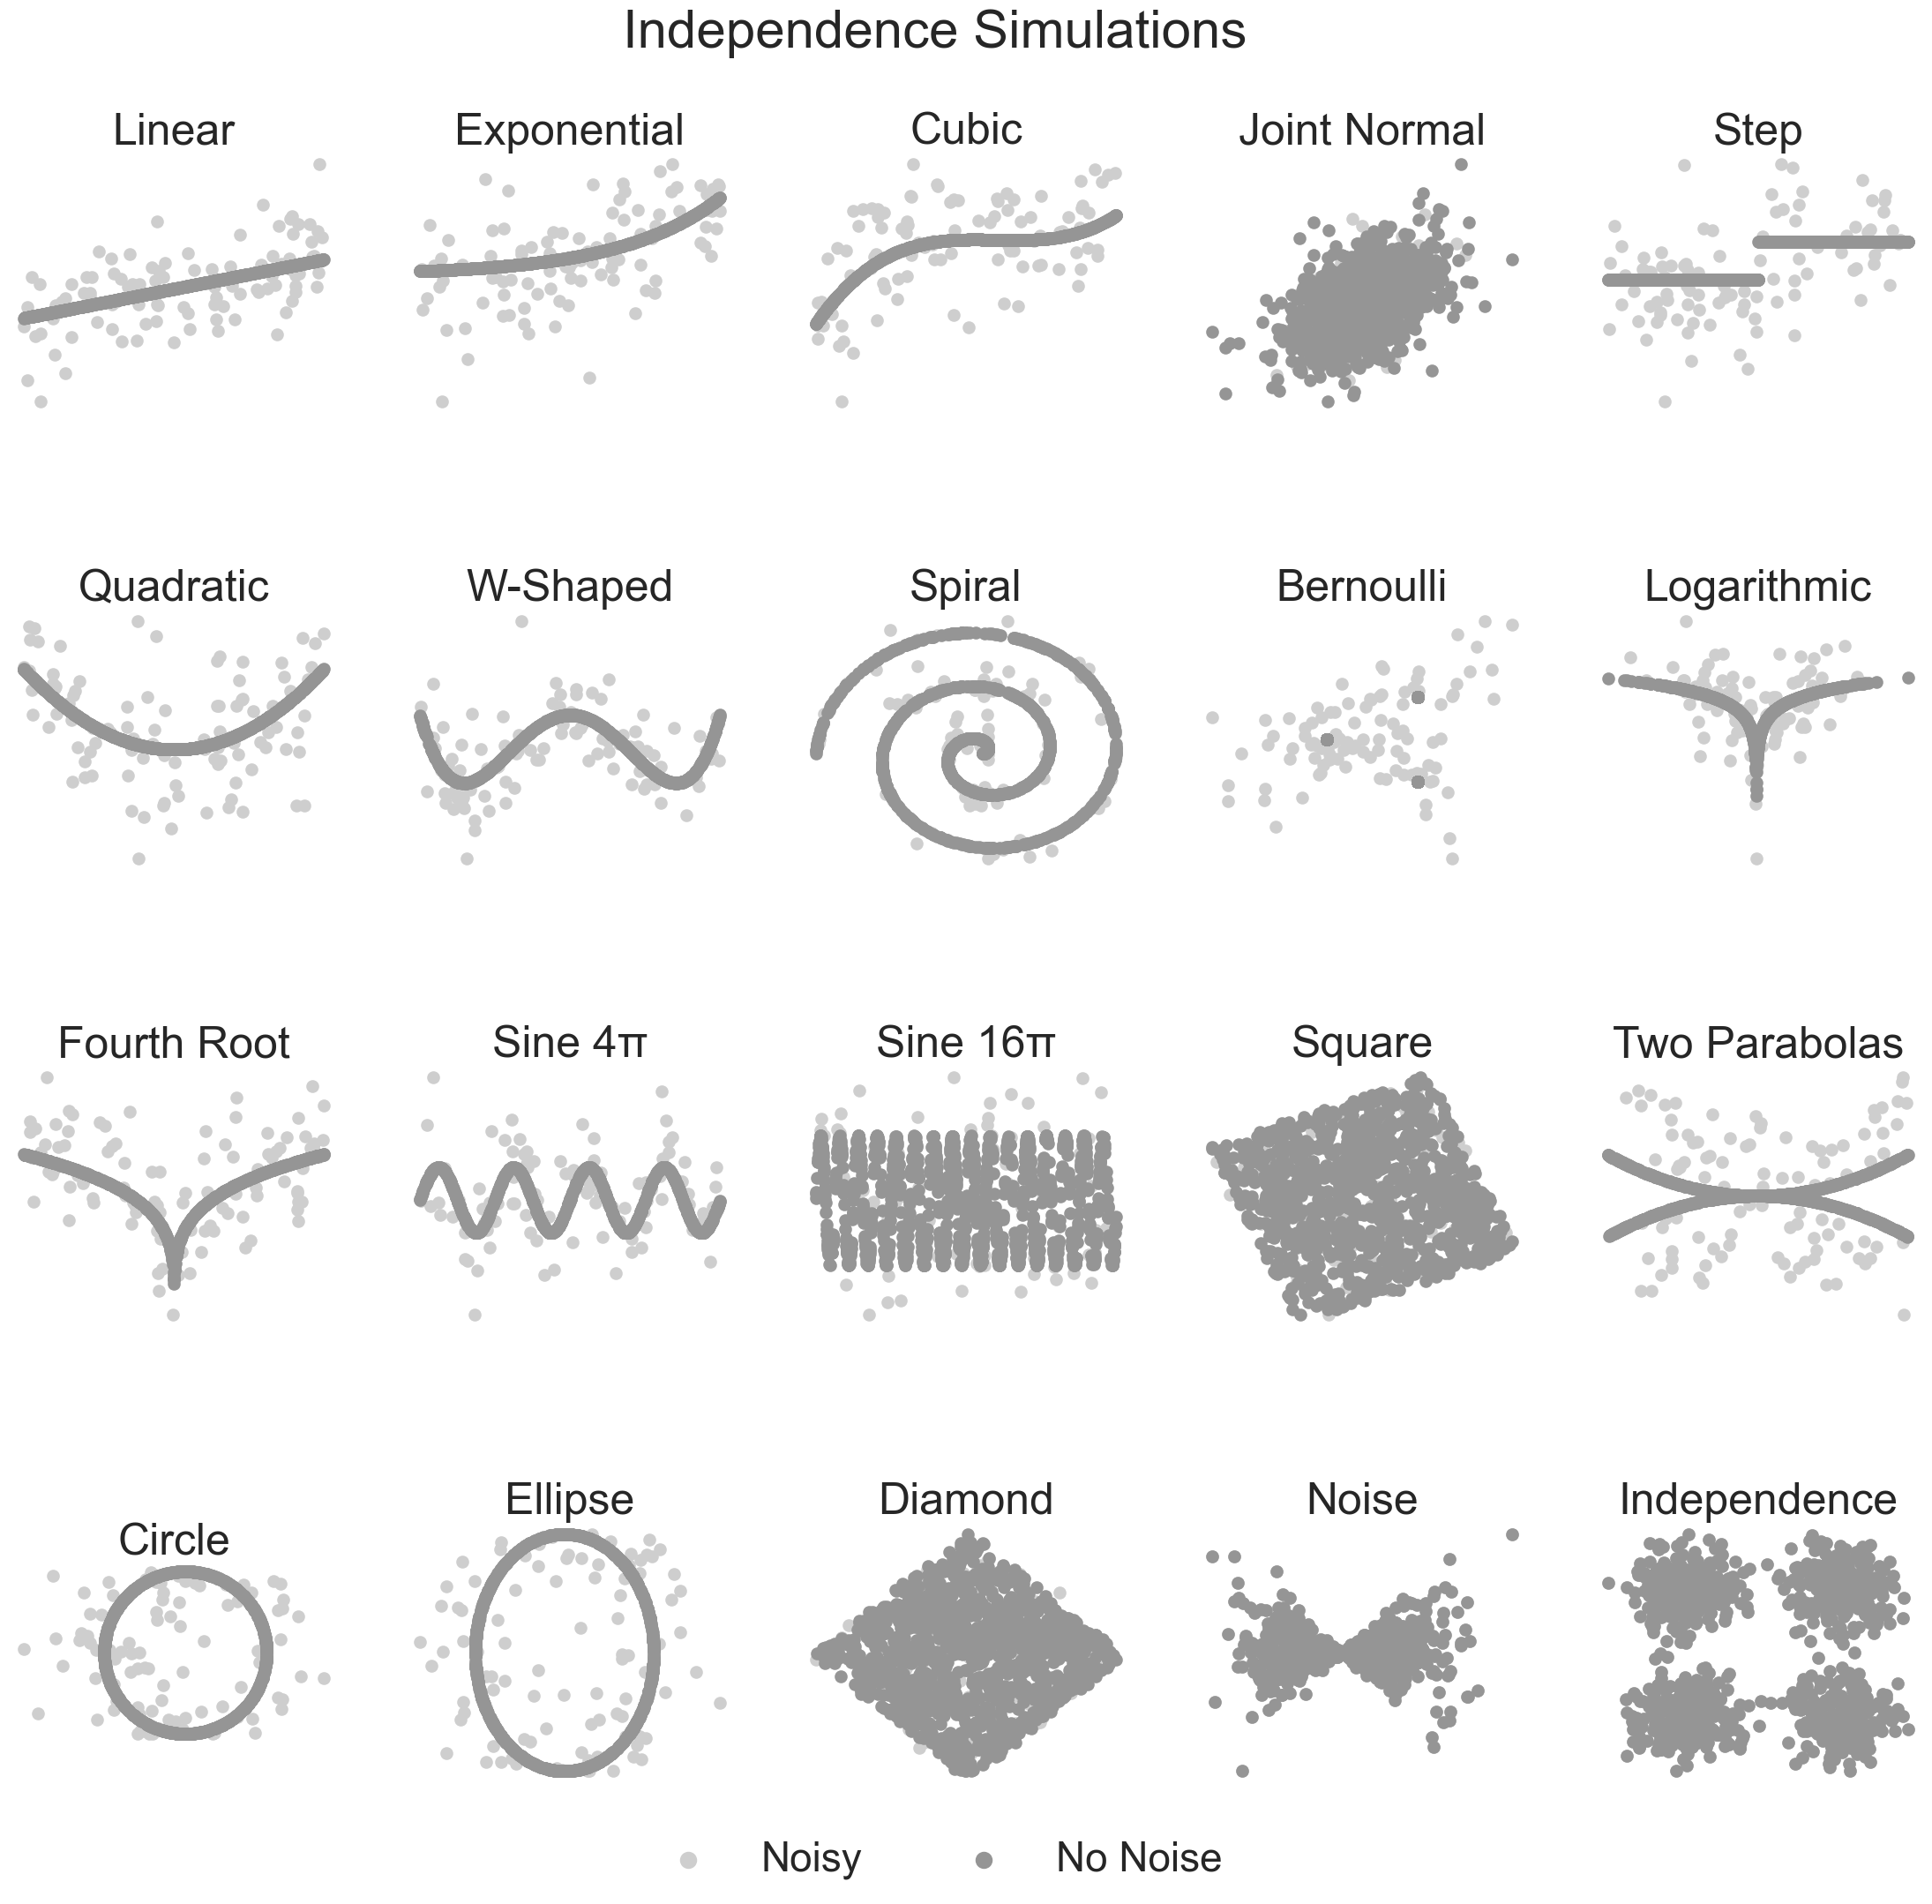

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hyppo.tools import SIMULATIONS

# make plots look pretty
sns.set(color_codes=True, style="white", context="talk", font_scale=2)
PALETTE = sns.color_palette("Greys", n_colors=9)
sns.set_palette(PALETTE[2::2])

# constants
NOISY = 100  # sample size of noisy simulation
NO_NOISE = 1000  # sample size of noise-free simulation

# simulation titles
SIM_TITLES = [
    "Linear",
    "Exponential",
    "Cubic",
    "Joint Normal",
    "Step",
    "Quadratic",
    "W-Shaped",
    "Spiral",
    "Bernoulli",
    "Logarithmic",
    "Fourth Root",
    "Sine 4\u03C0",
    "Sine 16\u03C0",
    "Square",
    "Two Parabolas",
    "Circle",
    "Ellipse",
    "Diamond",
    "Noise",
    "Independence",
]


# make a function that runs the code depending on the simulation
def plot_sims():
    """Plot simulations"""
    fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(28, 24))

    plt.suptitle("Independence Simulations", y=0.93, va="baseline")

    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            count = 5 * i + j
            sim_title = SIM_TITLES[count]
            sim = list(SIMULATIONS.values())[count]

            # the multiplicative noise and independence simulation don't have a noise
            # parameter
            if sim_title in ["Noise", "Independence"]:
                x, y = sim(NO_NOISE, 1)
                x_no_noise, y_no_noise = x, y
            else:
                x, y = sim(NOISY, 1, noise=True)
                x_no_noise, y_no_noise = sim(NO_NOISE, 1)
            
            # plot the noise and noise-free sims
            col.scatter(x, y, label="Noisy")
            col.scatter(x_no_noise, y_no_noise, label="No Noise")

            # make the plot look pretty
            col.set_title("{}".format(sim_title))
            col.set_xticks([])
            col.set_yticks([])
            if count == 15:
                # otherwise, circle doesn't look like a circle
                col.set_aspect('equal')
            sns.despine(left=True, bottom=True, right=True)

    leg = plt.legend(
        bbox_to_anchor=(0.5, 0.1),
        bbox_transform=plt.gcf().transFigure,
        ncol=5,
        loc="upper center",
    )
    leg.get_frame().set_linewidth(0.0)
    for legobj in leg.legend_handles:
        legobj.set_linewidth(5.0)
    plt.subplots_adjust(hspace=0.75)
    plt.savefig(
        "../kmerf/figs/indep_simulations.pdf", transparent=True, bbox_inches="tight"
    )


# run the created function for the simultions
plot_sims()

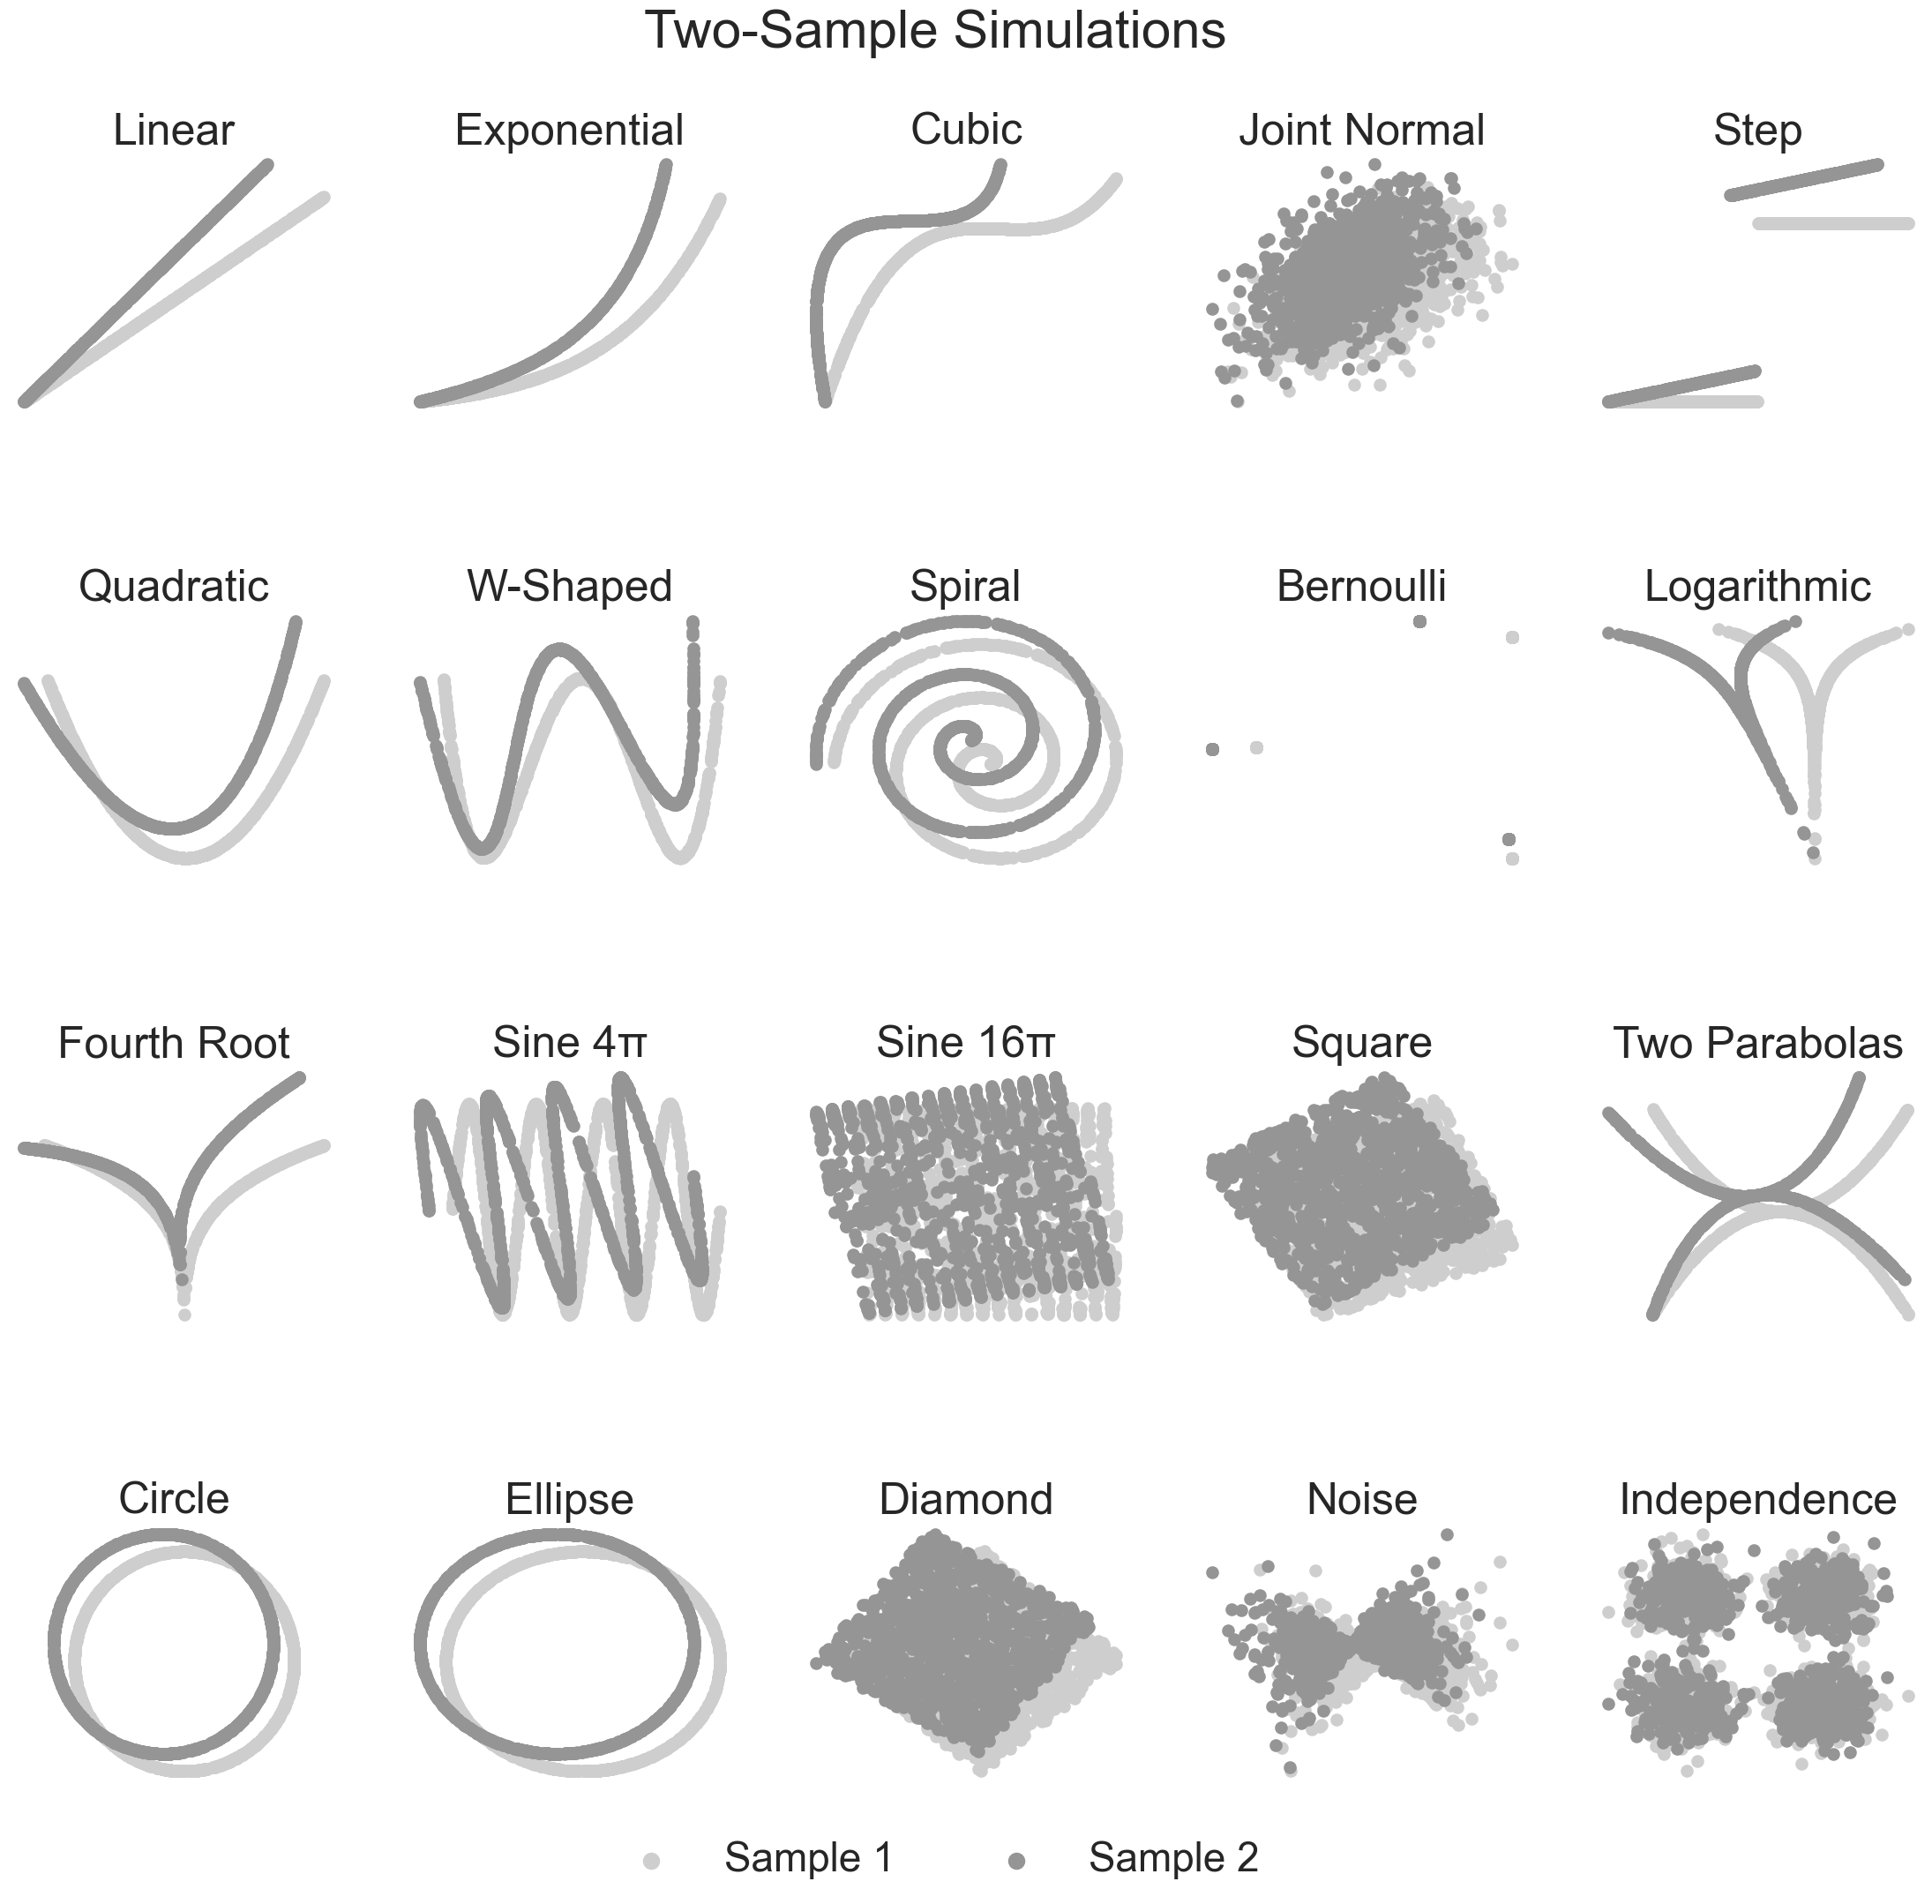

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hyppo.tools import SIMULATIONS, rot_ksamp
from hyppo.tools.ksample_sim import _2samp_rotate

# make plots look pretty
sns.set(color_codes=True, style="white", context="talk", font_scale=2)
PALETTE = sns.color_palette("Greys", n_colors=9)
sns.set_palette(PALETTE[2::2])

# constants
N = 1000  # sample size of noisy simulation

# simulation titles
SIM_TITLES = [
    "Linear",
    "Exponential",
    "Cubic",
    "Joint Normal",
    "Step",
    "Quadratic",
    "W-Shaped",
    "Spiral",
    "Bernoulli",
    "Logarithmic",
    "Fourth Root",
    "Sine 4\u03C0",
    "Sine 16\u03C0",
    "Square",
    "Two Parabolas",
    "Circle",
    "Ellipse",
    "Diamond",
    "Noise",
    "Independence",
]


# make a function that runs the code depending on the simulation
def plot_sims():
    """Plot simulations"""
    fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(28, 24))

    plt.suptitle("Two-Sample Simulations", y=0.93, va="baseline")

    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            count = 5 * i + j
            sim_title = SIM_TITLES[count]
            sim = list(SIMULATIONS.keys())[count]
            u, v = rot_ksamp(sim, n=N, p=1, degree=5, noise=False)
            
            # min max normalization for visualization purposes
            if sim_title == "Independence":
                u1, u2 = SIMULATIONS[sim](n=N, p=1)
                v1, v2 = SIMULATIONS[sim](n=N, p=1)
            else:
                if sim_title == "Noise":
                    u1, u2 = SIMULATIONS[sim](n=N, p=1)
                else:
                    u1, u2 = SIMULATIONS[sim](n=N, p=1, noise=False)
                u1 = (u1 - np.min(u1)) / np.max(u1)
                u2 = (u2 - np.min(u2)) / np.max(u2)
                v1, v2 = _2samp_rotate(sim, u1, u2, p=1, degree=10)
            
            
            # plot the group 1 and rotated group 2
            col.scatter(u1, u2, label="Sample 1")
            col.scatter(v1, v2, label="Sample 2")

            # make the plot look pretty
            col.set_title("{}".format(sim_title))
            col.set_xticks([])
            col.set_yticks([])
            if count == 15:
                # otherwise, circle doesn't look like a circle
                col.set_aspect('equal')
            sns.despine(left=True, bottom=True, right=True)

    leg = plt.legend(
        bbox_to_anchor=(0.5, 0.1),
        bbox_transform=plt.gcf().transFigure,
        ncol=5,
        loc="upper center",
    )
    leg.get_frame().set_linewidth(0.0)
    for legobj in leg.legend_handles:
        legobj.set_linewidth(5.0)
    plt.subplots_adjust(hspace=0.75)
    plt.savefig(
        "../kmerf/figs/ksamp_simulations.pdf", transparent=True, bbox_inches="tight"
    )


# run the created function for the simultions
plot_sims()